# Explore here

In [4]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from pickle import dump


In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data.to_csv("../data/raw/diabetes.csv", index=False)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


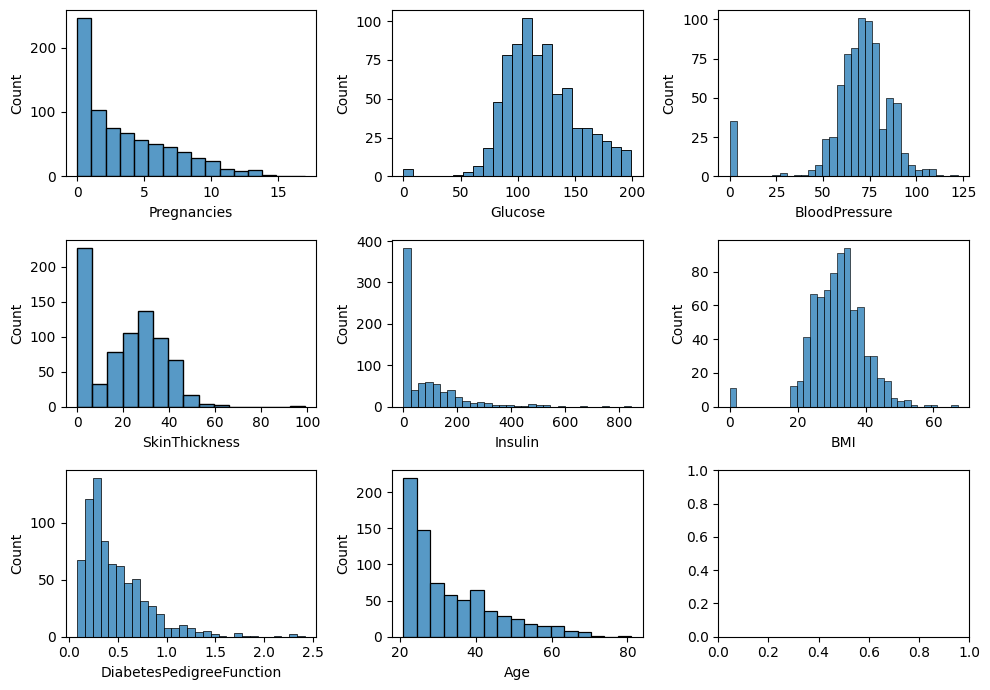

In [8]:
fig, axis = plt.subplots(3, 3, figsize=(10, 7))

sns.histplot(ax = axis[0,0], data = data, x = "Pregnancies")
sns.histplot(ax = axis[0,1], data = data, x = "Glucose")
sns.histplot(ax = axis[0,2], data = data, x = "BloodPressure")
sns.histplot(ax = axis[1,0], data = data, x = "SkinThickness")
sns.histplot(ax = axis[1,1], data = data, x = "Insulin")
sns.histplot(ax = axis[1,2], data = data, x = "BMI")
sns.histplot(ax = axis[2,0], data = data, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[2,1], data = data, x = "Age")

plt.tight_layout()
plt.show()

<Axes: >

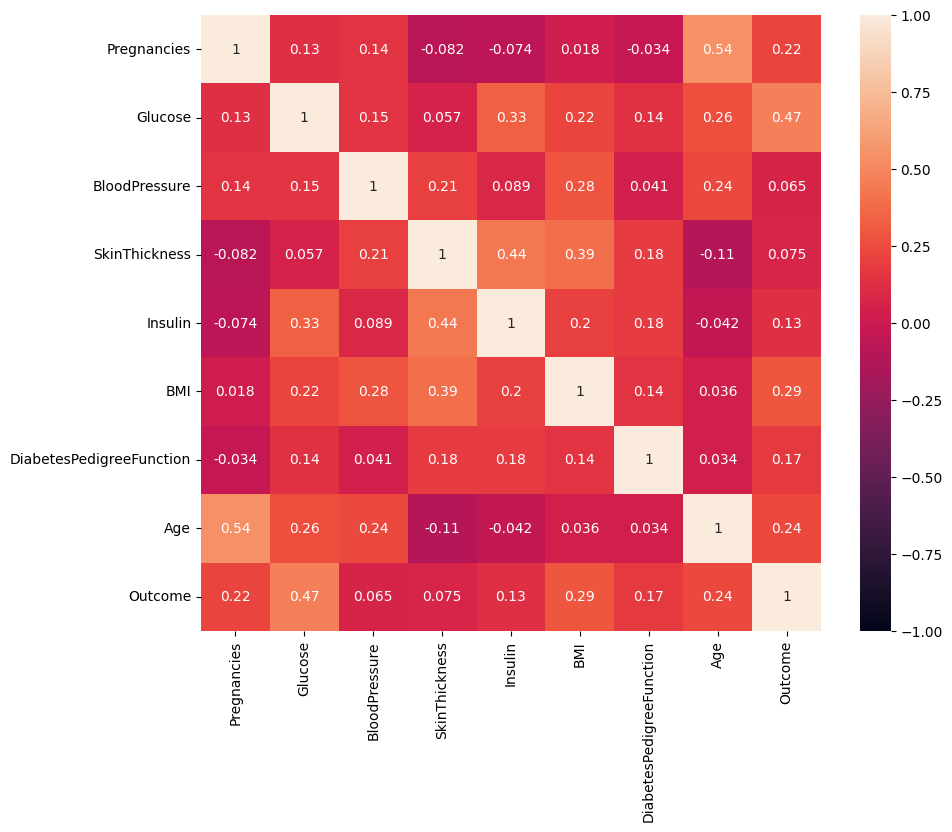

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(3), vmax=1, vmin=-1, annot=True)

#Evidentemente la concentracion de glucosa es lo que tiene mas relacion con la diabetes

In [10]:
X = data.drop(['Outcome'],axis=1)
Y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

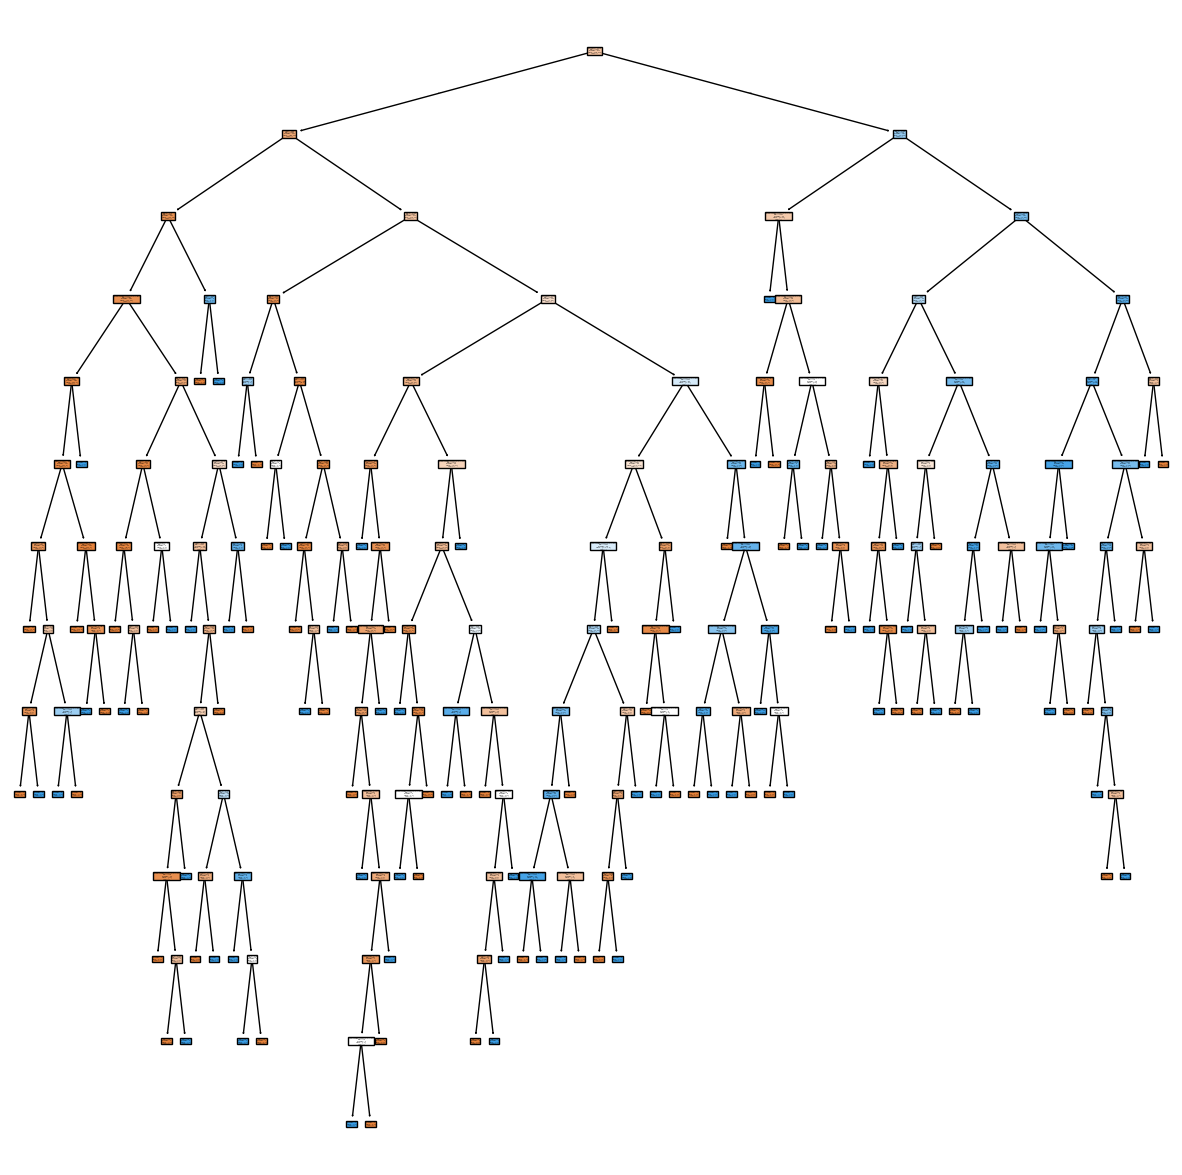

In [12]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [13]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [14]:
matriz_conf = pd.DataFrame(confusion_matrix(y_test, y_pred))
matriz_conf

,0,1
0,78,20
1,31,25


In [15]:
accuracy_score(y_test, y_pred)

0.6688311688311688

In [16]:
clean_train = pd.concat([X_train, y_train], axis=1)
clean_test = pd.concat([X_test, y_test], axis=1)

In [24]:
clean_train.to_csv("../data/processed/clean_train.csv", index = False)
clean_test.to_csv("../data/processed/clean_test.csv", index = False)

In [18]:
hyperparams = {
    "criterion": ["gini","entropy"],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

In [19]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [20]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 2, min_samples_split = 5, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

In [21]:
y_pred = model.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.7662337662337663

In [23]:
dump(model, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-2_minsplit5_42.sav", "wb"))